In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset creation library
from sklearn.datasets import make_blobs

In [3]:
# Creating dataset with 100 observations and 2 features and a target variable with binary classes 0 and 1
x,y = make_blobs(n_samples=100, n_features=2,centers= 2, random_state= 1)

In [4]:
# Converting arrays of data to dataframe
df = pd.concat([pd.DataFrame(x, columns = ['feature1','feature2']), pd.DataFrame(y, columns = ['target'])], axis = 1)
df

,feature1,feature2,target
0,-0.794152,2.104951,0
1,-9.151552,-4.812864,1
2,-3.103674,3.902024,0
3,-1.429465,5.168501,0
4,-7.469387,-4.201983,1
...,...,...,...
95,-8.958888,-1.766369,1
96,-9.980303,-5.075367,1
97,-1.373973,5.291631,0
98,-9.186761,-2.908906,1


In [5]:
# Information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   target    100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB


In [6]:
# Descriptive Statistics
df.describe()

,feature1,feature2,target
count,100.000000,100.000000,100.000000
mean,-5.622233,0.227650,0.500000
std,4.166358,4.325661,0.502519
min,-11.855694,-6.388186,0.000000
25%,-9.565816,-3.910269,0.000000
50%,-5.286530,0.169291,0.500000
75%,-1.591414,4.458523,1.000000
max,0.526016,6.506745,1.000000


In [7]:
# Checking null values
df.isnull().sum()

feature1    0
feature2    0
target      0
dtype: int64

No null values present in our dataset

In [8]:
# Duplicate value check
df.duplicated().sum()

0

No duplicate values present in the dataset

In [9]:
# Studying the target variable
df['target'].value_counts()

1    50
0    50
Name: target, dtype: int64

This dummy dataset is perfectly balanced with 50 0s and 50 1s

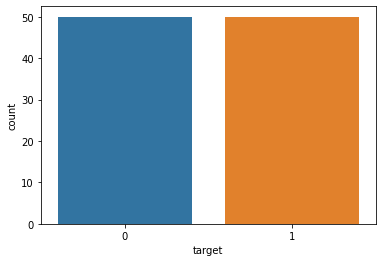

In [10]:
# Visualizing class balance of dataset - using count plot
sns.countplot(x = 'target', data = df)
plt.show()

###### Correlation check
- As Naive Bayes classifier works on its Naive assumption that each pair of features are conditionally independent and 
  each feature has equal effect on the target, so we will have correlation check to remove highly correlated columns
- Mostly dataset do not hold true the Naive assumption, but still Naive Bayes classifier works fine on them.
  However, it is better to remove highly correlated columns to approximate the Naive assumption and enhance the model 
  performance.
- Here, we have only two features, which is pretty less so, it is obvious we won't remove the highly correlated column.
  But for the EDA purpose, we will produce the correlation matrix.

In [11]:
# Correlation Matrix
corr_mat = df.corr()
corr_mat

,feature1,feature2,target
feature1,1.000000,0.949145,-0.979127
feature2,0.949145,1.000000,-0.975616
target,-0.979127,-0.975616,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

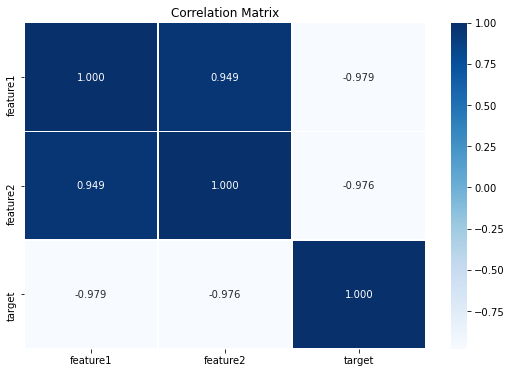

In [12]:
# Visualizing correlation matrix using heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_mat, annot=True, fmt=".3f", linewidths=.5, ax=ax, cmap = 'Blues')
plt.title('Correlation Matrix')

- Feature 1 and feature 2 are highly correlated.
- Feature 1 and feature 2 have almost same correlation (-ve) with the target variable. However, this doesn't necessarily 
  say that increase in target is 'caused' due to decrease in feature 1 or feature 2. Correlation doesn't mean causation.
- We won't drop any of the features as these are already less. Moreover, Naive Bayes works well even if there are highly 
  correlated features.

In [13]:
df['feature1'].dtypes

dtype('float64')

In [14]:
# Variance check- features having 0 or near to 0 variance have very less predictive power, i.e, whatever the target value be
# it will have same feature value
col = df.columns
for i in range(len(col)):
    if ((df[col[i]].dtypes == 'int64') or (df[col[i]].dtypes == 'float64')):
        variance = round(df[col[i]].var(),2)
        print(f'Variance of {col[i]} = {variance}')

Variance of feature1 = 17.36
Variance of feature2 = 18.71


There are no zero variance columns

###### Gaussian Naive Bayes Classifier is used for features which are continuous in nature and follow gaussian/ normal distribution
- This dataset satisfies the condition of continuous feature values
- But whether the continous feature values follow the gaussian distribution, that we have to check

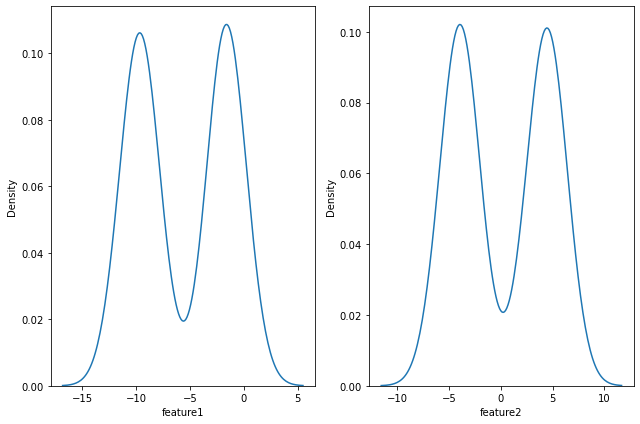

In [15]:
# Checking distribution of features
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
sns.kdeplot(df['feature1'])
plt.subplot(1,2,2)
sns.kdeplot(df['feature2'])
plt.tight_layout()
plt.show()

This doesn't look like normal distribution

In [16]:
# Using Yeo Johnson transformation to convert features values to approximately normal distribution
from scipy.stats import yeojohnson

In [17]:
x1_yeo, lam1 = yeojohnson(df['feature1'])
x2_yeo, lam2  = yeojohnson(df['feature2'])

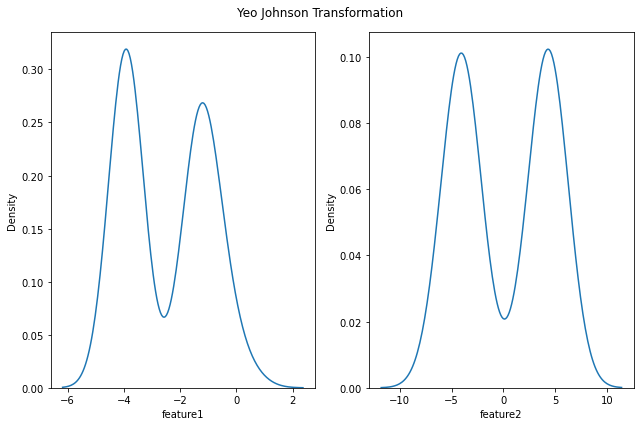

In [18]:
# Visualizing dist. to check the result
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
sns.kdeplot(x1_yeo)
plt.xlabel('feature1')
plt.subplot(1,2,2)
sns.kdeplot(x2_yeo)
plt.xlabel('feature2')
plt.suptitle('Yeo Johnson Transformation')
plt.tight_layout()
plt.show()

There is not much improvement in getting approx. normal dist.

In [19]:
# Let's try log transformation to get aprrox. normal dist. ( x -> log_e(x))
x1_log = np.log(df['feature1'])
x2_log = np.log(df['feature2'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


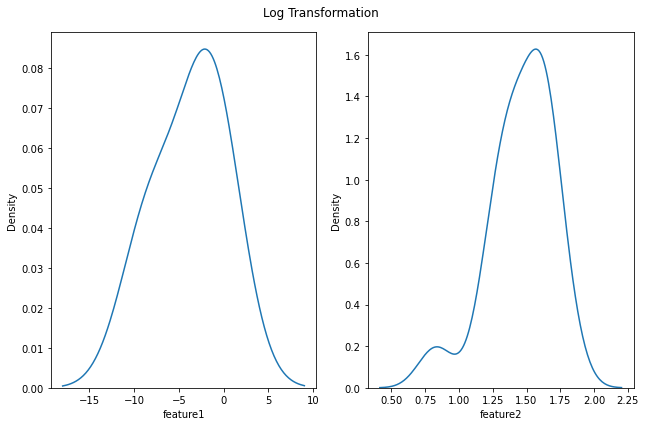

In [20]:
# Visualizing dist. to check the result
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
sns.kdeplot(x1_log)
plt.xlabel('feature1')
plt.subplot(1,2,2)
sns.kdeplot(x2_log)
plt.xlabel('feature2')
plt.suptitle('Log Transformation')
plt.tight_layout()
plt.show()

There is tremendous improvement in getting approx. normal distribution

In [21]:
# Let's try reverse transformation to compare it with log transformation
# But before that let's check if there are any zero values as reverse transformation won't be applicable then.
count_1 = 0
for i in df['feature1']:
    if i == 0:
        count_1 += 1
print('No. of zeroes in feature 1 = ',count_1)

count_2 = 0
for i in df['feature2']:
    if i == 0:
        count_2 += 1
print('No. of zeroes in feature 2 = ',count_2)

No. of zeroes in feature 1 =  0
No. of zeroes in feature 2 =  0


No zero values are present in feature1 and feature2

In [22]:
x1_reverse = 1/df['feature1']
x2_reverse = 1/df['feature2']

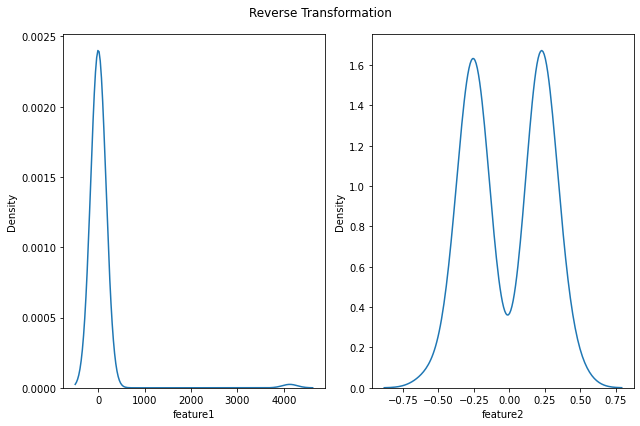

In [23]:
# Visualizing dist. to check the result
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
sns.kdeplot(x1_reverse)
plt.xlabel('feature1')
plt.subplot(1,2,2)
sns.kdeplot(x2_reverse)
plt.xlabel('feature2')
plt.suptitle('Reverse Transformation')
plt.tight_layout()
plt.show()

- This transformation also doesn't approximate to normal distribution.
- Hence, 'log transformation' looks best.

In [24]:
# Comparing skewness values of orginal feature values and log transformed features
from scipy.stats import skew

In [25]:
skew_x1 = skew(df['feature1'])
skew_x2 = skew(df['feature2'])
skew_x1_log = skew(x1_log)
skew_x2_log = skew(x2_log)
dic = {'skewness of original features' : [skew_x1,skew_x2], 'skewness of log transformed features' : [skew_x1_log, skew_x2_log]}
pd.DataFrame(dic, index = ['feature 1', 'feature 2'])

,skewness of original features,skewness of log transformed features
feature 1,-0.014158,NaN
feature 2,0.001527,NaN


In [26]:
x1_log

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
95         NaN
96         NaN
97         NaN
98         NaN
99   -2.462145
Name: feature1, Length: 100, dtype: float64

In [27]:
x2_log

0     0.744292
1          NaN
2     1.361495
3     1.642583
4          NaN
        ...   
95         NaN
96         NaN
97    1.666127
98         NaN
99    1.293434
Name: feature2, Length: 100, dtype: float64

- We can see that on log transformation many values have become NaN, so even, though we have got approx. normal dist. on log but values are becoming NaN and skewness is also NaN. 
- Also, if we look at the skewness values of original features, it is nearly 0 and we know that skewness of normal
  distribution is 0 as it is symmetric about mean.
- So, we will not consider any transformation and keep values as it is.

###### Assume continuous feature values to follow normal distribution

###### Naive Bayes work on Bayes Theorem :-
---------------------------------------  
- P(h/d) = P(d/h) * P(h)/ P(d)

- P(h/d) -> class conditional probability
- P(d/h) -> liklihood probability
- P(h) -> prior probability
- P(d) -> prob. of evidence

- For different class conditional probability, P(d) is constant
- so, P(h/d) ~ P(d/h) * P(h)

- P(d/h1) = P(d1/h1) * P(d2/h1) * P(d3/h1) *------ *P(h1)

###### For Gaussian Naive Bayes having continuous feature d1 and classes h1 and h2
- P(d1/h1) = pdf(Gaussian) = [1/sqrt(2*pi*sigma^2)]*e^(-(x-mu)^2/2*sigma^2), where, mu and sigma are mean and std. dev. for
  d1 belonging to class h1
- P(d1/h2) = pdf(Gaussian) = [1/sqrt(2*pi*sigma^2)]*e^(-(x-mu)^2/2*sigma^2), where, mu and sigma are mean and std. dev.       for d1 belonging to class h2

In [28]:
# Importing normal distribution function for Gaussain Naive Bayes
from scipy.stats import norm

In [29]:
# Creating gaussian distribution function
def gaussian_dist(x):
    x = np.array(x)
    x_mean = np.mean(x)
    x_std = np.std(x)
    dist = norm(x_mean,x_std)
    return dist

In [30]:
# Generating Random Sequence from 0 to 99
random_sequence = np.random.permutation(np.arange(0,100))
print('Random Sequence = ',random_sequence)

# Generating train set features (80%)
x_train = df[['feature1','feature2']].iloc[random_sequence[20:101], :]
print('X_train = ',x_train)

# Generating train set target (80%)
y_train = df['target'][random_sequence[20:101]]
print('y_train = ',y_train)

# Generating test set features (20%)
x_test = df[['feature1','feature2']].iloc[random_sequence[0:20], :]
print('X_test = ',x_test)

# Generating test set target (20%)
y_test = df['target'][random_sequence[0:20]]
print('y_test = ',y_test)

Random Sequence =  [63  1 59 83 21 39 97 46 66 60 10 23 96  9 81 99 62 25 28 30 40 33  5 67
 85 91 76 56 75 24 44 74 82 93 65 73 49 98 84 70 72 22 15 16 42 80 48 61
 37 29 41  7 64  2 55 18 77 54 58 68 90 95 32 47 26 88  6 51 20 78 87 14
 27 19 13 17  0 45  4 43 35 31 86 94 50 89 34  8 57 79 71 38 11 12 92 53
 69 36  3 52]
X_train =       feature1  feature2
40  -9.717047 -4.026461
33  -1.851395  3.518861
5   -9.195851 -3.906781
67 -11.270271 -3.639801
85  -0.525790  3.306599
..        ...       ...
53 -10.398591 -3.129343
69  -1.236066  4.483830
36  -0.460642  4.591646
3   -1.429465  5.168501
52  -9.919891 -3.334968

[80 rows x 2 columns]
y_train =  40    1
33    0
5     1
67    1
85    0
     ..
53    1
69    0
36    0
3     0
52    1
Name: target, Length: 80, dtype: int32
X_test =       feature1  feature2
63 -10.022329 -4.728510
1   -9.151552 -4.812864
59  -1.146630  4.108397
83  -8.093054 -2.842292
21 -10.263931 -3.920734
39 -10.134157 -4.072403
97  -1.373973  5.291631
46  -0.757969

In [31]:
# Creating dataframe of traininng set
df_train = pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis = 1)
print(df_train)

# Creating dataframe of test set
df_test = pd.concat([pd.DataFrame(x_test),pd.DataFrame(y_test)], axis = 1)
print(df_test)

     feature1  feature2  target
40  -9.717047 -4.026461       1
33  -1.851395  3.518861       0
5   -9.195851 -3.906781       1
67 -11.270271 -3.639801       1
85  -0.525790  3.306599       0
..        ...       ...     ...
53 -10.398591 -3.129343       1
69  -1.236066  4.483830       0
36  -0.460642  4.591646       0
3   -1.429465  5.168501       0
52  -9.919891 -3.334968       1

[80 rows x 3 columns]
     feature1  feature2  target
63 -10.022329 -4.728510       1
1   -9.151552 -4.812864       1
59  -1.146630  4.108397       0
83  -8.093054 -2.842292       1
21 -10.263931 -3.920734       1
39 -10.134157 -4.072403       1
97  -1.373973  5.291631       0
46  -0.757969  4.908984       0
66  -2.413958  5.659358       0
60  -1.472999  4.816542       0
10 -10.036408 -5.569121       1
23  -1.340521  4.157119       0
96  -9.980303 -5.075367       1
9   -1.171042  4.330918       0
81 -11.196981 -3.090003       1
99   0.085252  3.645283       0
62  -9.494528 -2.660123       1
25 -10.307829 -6.

###### Training the model

In [32]:
# Calculating prior probability - P(h)

# Prior prob. of class 0
p_y0 = len(df_train[df_train['target'] == 0])/len(df_train['target'])
print('Prior probability of class 0 = ',p_y0)

# Prior prob. of class 1
p_y1 = len(df_train[df_train['target'] == 1])/len(df_train['target'])
print('Prior probability of class 1 = ',p_y1)

Prior probability of class 0 =  0.5
Prior probability of class 1 =  0.5


In [33]:
# Calculating liklihood probability - P(d/h)

# Generating gaussian dist. for feature 1 belonging to class 0
p_f1_y0 = gaussian_dist(df_train[df_train['target'] == 0]['feature1'])

# Generating gaussian dist.for feature 1 belonging to class 1
p_f1_y1 = gaussian_dist(df_train[df_train['target'] == 1]['feature1'])

# Generating gaussian dist. for feature 2 belonging to class 0
p_f2_y0 = gaussian_dist(df_train[df_train['target'] == 0]['feature2'])

# Generating gaussian dist. for feature 2 belonging to class 1
p_f2_y1 = gaussian_dist(df_train[df_train['target'] == 1]['feature2'])

In [34]:
# Calculating class conditional probability - Defining it as a function

def class_cond_prob(prior,liklihood_f1,liklihood_f2):
    p_y_f = prior*liklihood_f1*liklihood_f2
    return p_y_f

In [35]:
a = np.array([2,45.5,69999.578,7,888.907])
np.argmax(a)

2

In [36]:
# Predicting probabilities of test set features
p_feat1_y0 = p_f1_y0.pdf(df_test.iloc[:,0]) # P(feature1 / class0)
p_feat2_y0 = p_f2_y0.pdf(df_test.iloc[:,1]) # P(feature2 / class0)
py0_feat1feat2 = np.round(class_cond_prob(p_y0,p_feat1_y0,p_feat2_y0),3) # P(class 0 /feature1,feature2)

p_feat1_y1 = p_f1_y1.pdf(df_test.iloc[:,0]) # P(feature1 / class1)
p_feat2_y1 = p_f2_y1.pdf(df_test.iloc[:,1]) # P(feature2 / class1)
py1_feat1feat2 = np.round(class_cond_prob(p_y1,p_feat1_y1,p_feat2_y1),3) # P(class 1 /feature1,feature2)

In [37]:
# Predicting classes of test set features
y_pred = []
for i0 , i1 in zip(py0_feat1feat2,py1_feat1feat2):
    if i0 > i1:
        y_pred.append(0)
    if i0 < i1:
        y_pred.append(1)
print(y_pred)

[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]


In [38]:
# Adding predicted classes in test data frame
df_test.rename(columns = {'target' : 'actual class'}, inplace = True)
df_test['predicted class'] = y_pred

In [39]:
df_test

,feature1,feature2,actual class,predicted class
63,-10.022329,-4.728510,1,1
1,-9.151552,-4.812864,1,1
59,-1.146630,4.108397,0,0
83,-8.093054,-2.842292,1,1
21,-10.263931,-3.920734,1,1
39,-10.134157,-4.072403,1,1
97,-1.373973,5.291631,0,0
46,-0.757969,4.908984,0,0
66,-2.413958,5.659358,0,0
60,-1.472999,4.816542,0,0


We can observe that Gaussian Naive Bayes has predicted all classes correctly. Hence it performed extremely well with 100% test accuracy

###### Evaluation of model using following metrices :-
-------------------------------------------------------
Using Confusion Matrix :-

[TP => True Positive ; TN => True Negative ; FP => False Positive ; FN => False Negative]

1) Accuracy => (TP + TN / (TP + TN + FP + FN))

2) Recall => (TP / TP + FN)

3) Precision => (TP / TP + FP)

4) F1 Score => 2*Recall*Precision/(Recall + Precision)

In [53]:
# Calculating True Positives (A(1) -> P(1))
TP = []
for i,j in zip(df_test['actual class'], df_test['predicted class']):
    if i == 1 and j == 1:
        TP.append((i,j))
nTP = len(TP)
print('True Positives = ',nTP)

# Calculating True Negatives (A(0) -> P(0))
TN = []
for i,j in zip(df_test['actual class'], df_test['predicted class']):
    if i == 0 and j == 0:
        TN.append((i,j))
nTN = len(TN)
print('True Negatives = ',nTN)

# Calculating False Positives (A(0) -> P(1))
FP = []
for i,j in zip(df_test['actual class'], df_test['predicted class']):
    if i == 0 and j == 1:
        TN.append((i,j))
nFP = len(FP)
print('False Positives = ',nFP)

# Calculating False Negatives (A(1) -> P(0))
FN = []
for i,j in zip(df_test['actual class'], df_test['predicted class']):
    if i == 1 and j == 0:
        FN.append((i,j))
nFN = len(FN)
print('False Negatives = ',nFN)

# Accuracy
accuracy = round((nTP + nTN )/ (nTP + nTN + nFP + nFN),2)*100
print('Accuracy = ', accuracy,'%')

# Recall
recall = round((nTP/(nTP +nFN)),2)*100
print('Recall = ',recall,'%')

# Precision
precision = round(nTP/(nTP + nFP),2)*100
print('Precision = ',precision,'%')

# F1 Score
f1 = 2*recall*precision/(recall + precision)
print('F1 Score = ',f1,'%')

True Positives =  10
True Negatives =  10
False Positives =  0
False Negatives =  0
Accuracy =  100.0 %
Recall =  100.0 %
Precision =  100.0 %
F1 Score =  100.0 %


In [59]:
# Confusion Matrix
conf_mat = pd.DataFrame({'Predicted Class 0' : [nTN,nFN], 'Predicted Class 1' : [nTP,nFP]}, index = ['Actual Class 0','Actual Class 1'])
conf_mat

,Predicted Class 0,Predicted Class 1
Actual Class 0,10,10
Actual Class 1,0,0
